<a href="https://colab.research.google.com/github/divyansh4294/machine-learning/blob/main/ANN_with_keras_hyperparameter_tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [18]:
"""
@author = Divyansh.Gupta
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Taking churn modelling dataset which is easily available at kaggle [CLICK HERE](https://www.kaggle.com/shrutimechlearn/churn-modelling) to download

In [4]:
data = pd.read_csv("Churn_Modelling.csv")
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Description

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. As all the variable are self explainatory itself. So the target variable is EXITED.

1. 'RowNumber': Row Numbers from 1 to 10000
2. 'CustomerId': Unique Ids for bank customer identification
3. 'Surname': Customer's last name
4. 'CreditScore': Credit score of the customer
5. 'Geography': The country from which the customer belongs
6. 'Gender': Male or Female
7. 'Age': Age of the customer
8. 'Tenure': Number of years for which the customer has been with the bank
9. 'Balance': Bank balance of the customer
10. 'NumOfProducts': Number of bank products the customer is utilising
11. 'HasCrCard': Binary Flag for whether the customer holds a credit card with the bank or not
12. 'IsActiveMember': Binary Flag for whether the customer is an active member with the bank or not
13. 'EstimatedSalary': Estimated salary of the customer in Dollars
14. 'Exited': Binary flag 1 if the customer closed account with bank and 0 if the customer is retained



In [8]:
print("Shape of Dataset:",data.shape)

Shape of Dataset: (10000, 14)


In [12]:
# Removed Rownumber, CustomerID, Surname which doesn't have relevence
X = data.iloc[:, 3:13]
Y = data.iloc[:,-1]
print("Independent Features:",X.columns)
print("Dependent Features:",Y.name)

Independent Features: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
Dependent Features: Exited


Now Geography and Gender are categorical variable so we need to convert them into numerical form. As algorithm didn't work well with categorical variables so we need to convert into vector form for that we used get_dummies function from pandas

In [14]:
geo = pd.get_dummies(data['Geography'],drop_first=True)
gen = pd.get_dummies(data['Gender'],drop_first=True)

Now we are adding both numerical features to the main dataset and drop the categorical one

In [15]:
X = pd.concat([X,geo,gen],axis=1)
X = X.drop(['Geography','Gender'],axis=1)

Its time to split the dataset into training and testing dataset and we are considering 25% dataset for testing purpose with ) random state(random_state is the seed used by the random number generator)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

Now we have to scale our training and testing dataset into a range because it helps us in preventing vanishing gradient problem or exploading gradient problem.

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, LeakyReLU, ReLU, PReLU

In [22]:
print("Shape of training dataset",X_train.shape)

Shape of training dataset (7500, 11)


In [23]:
# We are initiallizing the a sequential model
classifier = Sequential()
# Adding first dense layer to our neural network which is having input dimensions = number of independent features we have  
# kernel initializer is he_uniform or we can use he_normal as well and. 
# the activation function is relu as it works well in dense layers
# the output units are 6, you can change to any number 
classifier.add(Dense(units = 6, kernel_initializer="he_uniform",activation="relu",input_dim = 11))
# Adding second dense layer to our neural network which is having same configuration
classifier.add(Dense(units = 6, kernel_initializer="he_uniform",activation="relu"))
# adding third dense layer having 1 output neuron with sigmoid activation funtion as we have only two classes to classify
# if classes to classify are more than 3 then we can use Softmax as an activation function
classifier.add(Dense(units = 1, kernel_initializer="glorot_uniform",activation="sigmoid"))
# its time to compile the whole model with optimizer.
# we are taking adam as an optimizer because this can dynamically adjust the learning rate along with momentum
# Used binary crossentropy as loss function 
classifier.compile(optimizer = "adam", loss="binary_crossentropy",metrics=['accuracy'])

In [24]:
# Model training 
mod_his = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
503/503 [==============================] - 2s 2ms/step - loss: 0.6692 - accuracy: 0.6172 - val_loss: 0.4779 - val_accuracy: 0.8045
Epoch 2/100
503/503 [==============================] - 1s 1ms/step - loss: 0.4703 - accuracy: 0.8030 - val_loss: 0.4512 - val_accuracy: 0.8061
Epoch 3/100
503/503 [==============================] - 1s 2ms/step - loss: 0.4340 - accuracy: 0.8189 - val_loss: 0.4412 - val_accuracy: 0.8078
Epoch 4/100
503/503 [==============================] - 1s 1ms/step - loss: 0.4246 - accuracy: 0.8203 - val_loss: 0.4342 - val_accuracy: 0.8106
Epoch 5/100
503/503 [==============================] - 1s 1ms/step - loss: 0.4161 - accuracy: 0.8265 - val_loss: 0.4278 - val_accuracy: 0.8150
Epoch 6/100
503/503 [==============================] - 1s 1ms/step - loss: 0.4081 - accuracy: 0.8239 - val_loss: 0.4182 - val_accuracy: 0.8162
Epoch 7/100
503/503 [==============================] - 1s 1ms/step - loss: 0.4070 - accuracy: 0.8290 - val_loss: 0.4098 - val_accuracy: 0.8170

In [25]:
# Showing all the parameters 
print(mod_his.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


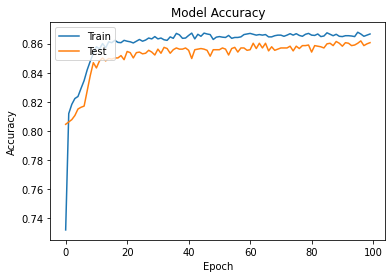

In [26]:
# Plot the accuracy of model with respect to epochs during training and testing
plt.plot(mod_his.history['accuracy'])
plt.plot(mod_his.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Test'],loc="upper left")
plt.show()


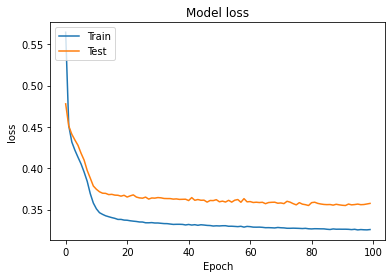

In [27]:
# Plot the loss of model with respect to epochs during training and testing

plt.plot(mod_his.history['loss'])
plt.plot(mod_his.history['val_loss'])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(['Train','Test'],loc="upper left")
plt.show()

In [28]:
# Predict the values for testing set and if the probability is more than 0.5 make it true else false
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [29]:
# Draw confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)


In [30]:
cm

array([[1881,  110],
       [ 243,  266]])

In [31]:
# Accuracy of model overall
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_pred,Y_test)
acc_score

0.8588

In [32]:
# install keras tunre
!pip install -U keras-tuner

     |████████████████████████████████| 71kB 5.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=c731b19d7938ec648b3fc4d62ca2b2d3ab4f815060c1a684f174c9c13d49521f
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=df28c64c5307386858f3f3d0de3d343035d88d07f937ec2335151620493db0d5
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [33]:
# Import tensorflow and tuners
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [34]:
# Building model
# Initialise keras sequential model
def build_model(hp):
  # Initialise keras sequential model
  model = keras.Sequential()
  # create a loop around for number of layers between 2 to 20
  for i in range(hp.Int("num_layers",2,20)):
    # Adding dense layer having neuron between 32 to 512 per layer
    model.add(layers.Dense(units=hp.Int('units_'+ str(i),
                                        min_value=32,
                                        max_value=512,
                                        step=32),
                           activation='relu'))
    # Adding output layer having 1 neuron and sigmoid as activation function
    model.add(layers.Dense(1, activation='sigmoid'))
    # training model with learning rate which is changing 0.01,0.001,0.0001
    model.compile(optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate',
                  values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
  return model

In [35]:
# RandomSearch as keras tuner having 5 trials with different parameters
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='Hyperparameter',
    project_name='Tuner')

In [37]:
# gives the summary of tuner
# number of layer min:2, max:20, step size: 1 
# Number of neuron in each layer min: 32, max:512, step size: 32
# Learning rate choose 1 in 0.01,0.001,0.0001
# Output layer having min:32, max:512, step:32
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}


In [38]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

In [39]:
tuner.search(X_train, Y_train,
             epochs=10,
             validation_data=(X_test,Y_test))

Trial 5 Complete [00h 00m 33s]
val_accuracy: 0.7964000105857849

Best val_accuracy So Far: 0.7964000105857849
Total elapsed time: 00h 02m 03s
INFO:tensorflow:Oracle triggered exit


In [40]:
models = tuner.get_best_models(num_models=3)

In [42]:
tuner.results_summary()

Results summary
Results in Hyperparameter/Tuner
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 20
units_0: 128
learning_rate: 0.001
units_1: 160
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 32
units_19: 32
Score: 0.7964000105857849
Trial summary
Hyperparameters:
num_layers: 6
units_0: 384
learning_rate: 0.01
units_1: 448
units_2: 448
units_3: 288
units_4: 448
units_5: 96
units_6: 352
units_7: 128
units_8: 448
units_9: 224
units_10: 256
units_11: 480
units_12: 32
units_13: 480
units_14: 384
units_15: 192
units_16: 512
units_17: 256
units_18: 352
units_19: 320
Score: 0.7964000105857849
Trial summary
Hyperparameters:
num_layers: 10
units_0: 288
learning_rate: 0.001
units_1: 64
units_2: 288
units_3: 256
units_4: 128
units_5: 320
units_6: 384
units_7: 384
units_8